In [1]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf

import os
for dirname, _, filenames in os.walk(r'C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\0\1 (1).JPG
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\0\1 (10).JPG
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\0\1 (100).JPG
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\0\1 (101).JPG
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\0\1 (102).JPG
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\0\1 (103).JPG
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\0\1 (104).JPG
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\0\1 (105).JPG
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\0\1 (106).JPG
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\0\1 (107).JPG
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\0\1 (108).JPG
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\0\1 (109).JPG
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\0\1 (11).JPG
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\0\1 (110).JPG
C:\Users\anil\Desktop\tomgrad5\tomato_grading_datase

C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\2\003.jpg
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\2\004.jpg
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\2\007.jpg
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\2\010.jpg
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\2\024.jpg
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\2\029.jpg
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\2\038.jpg
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\2\039.jpg
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\2\043.jpg
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\2\050.jpg
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\2\054.jpg
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\2\055.jpg
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\2\056.jpg
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\2\057.jpg
C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\2\a005.jpg
C:\Users\anil\Desktop\tomgrad5\tomato_g

In [2]:
from keras.models import Sequential 
from keras.layers import Conv2D, MaxPooling2D, Activation, Dropout, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array

In [3]:
train_path = r"C:\Users\anil\Desktop\tomgrad5\Training"
test_path = r"C:\Users\anil\Desktop\tomgrad5\Testing"
val_path= r"C:\Users\anil\Desktop\tomgrad5\Validation"

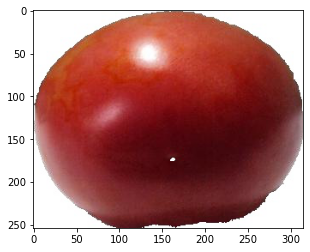

In [4]:
img = load_img(r'C:\Users\anil\Desktop\tomgrad5\tomato_grading_dataset\1\Aa001.jpg')
plt.imshow(img)
plt.axis("on")
plt.show()

In [5]:
img = img_to_array(img)
img.shape

(254, 315, 3)

In [6]:
model = Sequential()
model.add(Conv2D(128, 3, activation="relu", input_shape=(100,100,3)))
model.add(MaxPooling2D())
model.add(Conv2D(64, 3, activation="relu"))
model.add(Conv2D(32, 3, activation="relu"))
model.add(MaxPooling2D())
model.add(Dropout(0.50))
model.add(Flatten())
model.add(Dense(5000, activation = "relu"))
model.add(Dense(1000, activation = "relu"))
model.add(Dense(4, activation = "sigmoid"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 98, 98, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 49, 49, 128)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 47, 47, 64)        73792     
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 32)        18464     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 22, 22, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 22, 22, 32)        0

In [7]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                  shear_range = 0.3,
                  horizontal_flip=True,
                  vertical_flip=False,
                  zoom_range = 0.3
                  )
test_datagen  = ImageDataGenerator(rescale = 1./255)
valid_datagen  = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(train_path,
                                                    target_size=(100,100),
                                                    batch_size = 8,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
test_generator = test_datagen.flow_from_directory(test_path,
                                                    target_size=(100,100),
                                                    batch_size = 8,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")
valid_generator = valid_datagen.flow_from_directory(val_path,
                                                    target_size=(100,100),
                                                    batch_size = 8,
                                                    color_mode= "rgb",
                                                    class_mode = "categorical")

Found 1356 images belonging to 4 classes.
Found 456 images belonging to 4 classes.
Found 1356 images belonging to 4 classes.


In [34]:
train_generator = train_generator / 255
test_generator = test_generator / 255

TypeError: unsupported operand type(s) for /: 'DirectoryIterator' and 'int'

In [9]:
hist=model.fit(train_generator, epochs=25, validation_data=valid_generator)

Epoch 1/25
170/170 [==============================] - 266s 2s/step - loss: 0.3620 - accuracy: 0.6077 - val_loss: 0.2124 - val_accuracy: 0.7994
Epoch 2/25
170/170 [==============================] - 313s 2s/step - loss: 0.2517 - accuracy: 0.7471 - val_loss: 0.2116 - val_accuracy: 0.7655
Epoch 3/25
170/170 [==============================] - 301s 2s/step - loss: 0.2393 - accuracy: 0.7979 - val_loss: 0.2004 - val_accuracy: 0.8046
Epoch 4/25
170/170 [==============================] - 298s 2s/step - loss: 0.2072 - accuracy: 0.8215 - val_loss: 0.1604 - val_accuracy: 0.8695
Epoch 5/25
170/170 [==============================] - 275s 2s/step - loss: 0.1824 - accuracy: 0.8385 - val_loss: 0.1777 - val_accuracy: 0.8311
Epoch 6/25
170/170 [==============================] - 323s 2s/step - loss: 0.1769 - accuracy: 0.8518 - val_loss: 0.1703 - val_accuracy: 0.8459
Epoch 7/25
170/170 [==============================] - 306s 2s/step - loss: 0.1861 - accuracy: 0.8437 - val_loss: 0.1794 - val_accuracy: 0.8459

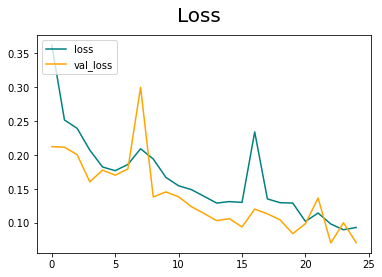

In [10]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [21]:
hist.history['loss']

[0.36198803782463074,
 0.25173187255859375,
 0.23933973908424377,
 0.2071770429611206,
 0.1823921501636505,
 0.17692269384860992,
 0.18607354164123535,
 0.20925156772136688,
 0.19418784976005554,
 0.16694873571395874,
 0.15462784469127655,
 0.14905555546283722,
 0.13919015228748322,
 0.12913671135902405,
 0.13130433857440948,
 0.130129873752594,
 0.2341223955154419,
 0.13529285788536072,
 0.12967945635318756,
 0.12914586067199707,
 0.10208233445882797,
 0.11442366987466812,
 0.09825193881988525,
 0.08977500349283218,
 0.09308268874883652]

In [22]:
hist.history['val_loss']

[0.21238483488559723,
 0.21156126260757446,
 0.20041483640670776,
 0.160400390625,
 0.17773649096488953,
 0.17026105523109436,
 0.179404616355896,
 0.29996252059936523,
 0.13819579780101776,
 0.14558283984661102,
 0.13835737109184265,
 0.12388879805803299,
 0.11382796615362167,
 0.10321900993585587,
 0.10608730465173721,
 0.09396595507860184,
 0.12021513283252716,
 0.11323493719100952,
 0.10440811514854431,
 0.0839848443865776,
 0.09870167821645737,
 0.13667133450508118,
 0.07034748792648315,
 0.10004231333732605,
 0.07070763409137726]

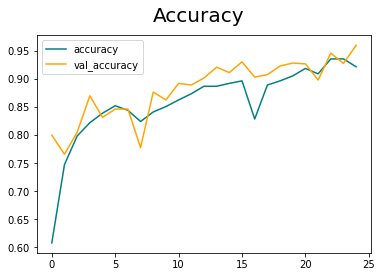

In [11]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

In [19]:
hist.history['accuracy']

[0.6076695919036865,
 0.7470501661300659,
 0.7979351282119751,
 0.8215339183807373,
 0.8384955525398254,
 0.8517699241638184,
 0.8436577916145325,
 0.8237463235855103,
 0.8407079577445984,
 0.8502950072288513,
 0.8620944023132324,
 0.8731563687324524,
 0.8864306807518005,
 0.8864306807518005,
 0.8915929198265076,
 0.8960176706314087,
 0.8281710743904114,
 0.8886430859565735,
 0.8960176706314087,
 0.9048672318458557,
 0.9181416034698486,
 0.9085545539855957,
 0.9351032376289368,
 0.9351032376289368,
 0.9210914373397827]

In [20]:
hist.history['val_accuracy']

[0.7994100451469421,
 0.7654867172241211,
 0.8045722842216492,
 0.8694690465927124,
 0.8311209678649902,
 0.8458701968193054,
 0.8458701968193054,
 0.7772861123085022,
 0.8761062026023865,
 0.8620944023132324,
 0.8915929198265076,
 0.8886430859565735,
 0.9011799693107605,
 0.9203540086746216,
 0.9107669591903687,
 0.9299409985542297,
 0.9026548862457275,
 0.9070796370506287,
 0.9225663542747498,
 0.9277285933494568,
 0.9262536764144897,
 0.8974926471710205,
 0.9454277157783508,
 0.9269911646842957,
 0.9594395160675049]

In [23]:
from keras.models import load_model

model.save("Tomatogradingmodel.h5")

In [24]:
import tensorflow as tf
probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [27]:
predictions = probability_model.predict(test_generator)

57/57 [==============================] - 16s 276ms/step


In [32]:
b=predictions[1]
print(b)

[0.17487772 0.17487772 0.17487776 0.4753668 ]
